# Computational Methods in Ordinary Differential Equations

*Dr Jon Shiach, Department of Computing and Mathematics, Manchester Metropolitan University*

---
# Second-Order Explicit Runge-Kutta Method

The second-order explicit [**Runge-Kutta**](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) method (RK2) can be written as

\begin{align*}
    y_{n+1} &= y_n + \frac{h}{2}(k_1 + k_2), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + h, y_n + hk_1),
\end{align*}

or alternatively using by the Butcher tableau

$$\begin{array}{c|cc} 0 & 0 \cr 1 & 1 \cr \hline & \frac{1}{2} & \frac{1}{2} \end{array}$$

The code below defines a function `rk2` that solves an IVP using the second-order explicit Runge-Kutta method where `tspan` is a two element array containing the lower and upper bounds of the $t$ domain, `y0` is the value of $y$ at the lower bound and `h` is the step length.

In [1]:
import numpy as np


def rk2(f, tspan, y0, h):
    """
    This function calculates the solution to an IVP using the second-order 
    explicit Runge-Kutta method
    """
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0
    
    for n in range(nsteps):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h, y[n] + h * k1)
        y[n+1] = y[n] + 0.5 * h * (k1 + k2)
        t[n+1] = t[n] + h
    
    return t, y

#### Example 1
The code below uses the Euler method to calculate the solution to the IVP

$$ y' = y \sin^2(t), \qquad t \in [0, 5], \qquad y_0 = 1,$$

using a step length $h=0.5$.

-----------------
  t  |     y
-----------------
 0.0 |  1.000000
 0.5 |  1.057462
 1.0 |  1.326929
 1.5 |  2.008750
 2.0 |  3.130216
 2.5 |  4.173408
 3.0 |  4.571604
 3.5 |  4.736398
 4.0 |  5.602018
 4.5 |  8.125678
 5.0 | 12.827275
-----------------


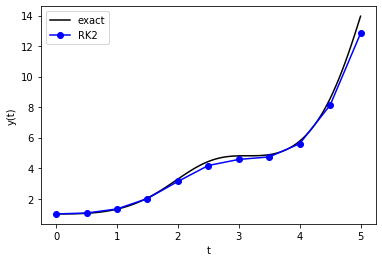

In [4]:
# Define ODE function
def f(t, y):
    return y * np.sin(t)**2

# Define IVP parameters
tspan = [0, 5]
y0 = 1
h = 0.5

# Invoke the RK2 method to solve IVP
t, y = rk2(f, tspan, y0, h)

# Output solution table
hline = '-' * 17
print(hline + '\n  t  |     y\n' + hline)
for i in range(len(t)):
    print(" {:0.1f} | {:9.6f}".format(t[i], y[i]))
print(hline)  

# Plot numerical and exact solutions
import matplotlib.pyplot as plt

texact = np.linspace(tspan[0], tspan[1], 100)
yexact = np.exp(0.5 * (texact - np.sin(texact) * np.cos(texact)))

fig, ax = plt.subplots()
ax.plot(texact, yexact, 'k-', label='exact')
ax.plot(t, y, 'bo-', label='RK2')
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.legend()

plt.show()

We can see that the RK2 method gives a reasonable approximation of the exact solution. To compare the RK2 method to the Euler method the solution using the Euler method for the same step length to the axes in the code cell below.

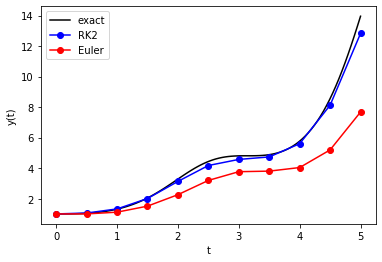

In [5]:
def euler(f, tspan, y0, h):
    """
    This function calculates the solution to the following IVP using the Euler method
    
            y'(t) = f(t, y(t)), tspan = [tmin, tmax], y(tmin) = y0
    """  
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0
    
    for n in range(nsteps):
        y[n+1] = y[n] + h * f(t[n], y[n])
        t[n+1] = t[n] + h
    
    return t, y


# Invoke the Euler method to solve IVP
teuler, yeuler = euler(f, tspan, y0, h)

# Plot numerical and exact solutions
fig, ax = plt.subplots()
ax.plot(texact, yexact, 'k-', label='exact')
ax.plot(t, y, 'bo-', label='RK2')
ax.plot(teuler, yeuler, 'ro-', label='Euler')
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.legend()
plt.show()